## Project :- Fatigue testing

## Data_Preprocessing

## Importing_libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Importing_Dataset 

In [2]:
# importing dataset 
df = pd.read_csv('40192_2013_16_MOESM1_ESM.csv')

In [3]:
df.head()

,Sl. No.,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,...,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
0,1,885,30,0,0,30,0.0,30.0,0.0,30,...,0.022,0.01,0.02,0.01,0.0,825,0.07,0.02,0.04,232
1,2,885,30,0,0,30,0.0,30.0,0.0,30,...,0.017,0.08,0.12,0.08,0.0,610,0.11,0.00,0.04,235
2,3,885,30,0,0,30,0.0,30.0,0.0,30,...,0.015,0.02,0.03,0.01,0.0,1270,0.07,0.02,0.00,235
3,4,885,30,0,0,30,0.0,30.0,0.0,30,...,0.024,0.01,0.02,0.01,0.0,1740,0.06,0.00,0.00,241
4,5,885,30,0,0,30,0.0,30.0,0.0,30,...,0.022,0.01,0.02,0.02,0.0,825,0.04,0.02,0.00,225


## Exploratory Data Analysis

In [4]:
# check missing values
df.isna().sum()

Sl. No.     0
NT          0
THT         0
THt         0
THQCr       0
CT          0
Ct          0
DT          0
Dt          0
QmT         0
TT          0
Tt          0
TCr         0
C           0
Si          0
Mn          0
P           0
S           0
Ni          0
Cr          0
Cu          0
Mo          0
RedRatio    0
dA          0
dB          0
dC          0
Fatigue     0
dtype: int64

In [5]:
# The column Sl. No. does not affect the Fatigue.
# droping this feature
df = df.drop('Sl. No.', axis=1)

In [6]:
df.columns

Index(['NT', 'THT', 'THt', 'THQCr', 'CT', 'Ct', 'DT', 'Dt', 'QmT', 'TT', 'Tt',
       'TCr', 'C', 'Si', 'Mn', 'P', 'S', 'Ni', 'Cr', 'Cu', 'Mo', 'RedRatio',
       'dA', 'dB', 'dC', 'Fatigue'],
      dtype='object')

## Effect of each feature on Fatigue

In [7]:
features = ['NT', 'THT', 'THt', 'THQCr', 'CT', 'Ct', 'DT', 'Dt', 'QmT', 'TT', 'Tt',
            'TCr', 'C', 'Si', 'Mn', 'P', 'S', 'Ni', 'Cr', 'Cu', 'Mo', 'RedRatio',
            'dA', 'dB', 'dC']

In [8]:
# enumerate generate a tuple 
list(enumerate(features))

[(0, 'NT'),
 (1, 'THT'),
 (2, 'THt'),
 (3, 'THQCr'),
 (4, 'CT'),
 (5, 'Ct'),
 (6, 'DT'),
 (7, 'Dt'),
 (8, 'QmT'),
 (9, 'TT'),
 (10, 'Tt'),
 (11, 'TCr'),
 (12, 'C'),
 (13, 'Si'),
 (14, 'Mn'),
 (15, 'P'),
 (16, 'S'),
 (17, 'Ni'),
 (18, 'Cr'),
 (19, 'Cu'),
 (20, 'Mo'),
 (21, 'RedRatio'),
 (22, 'dA'),
 (23, 'dB'),
 (24, 'dC')]

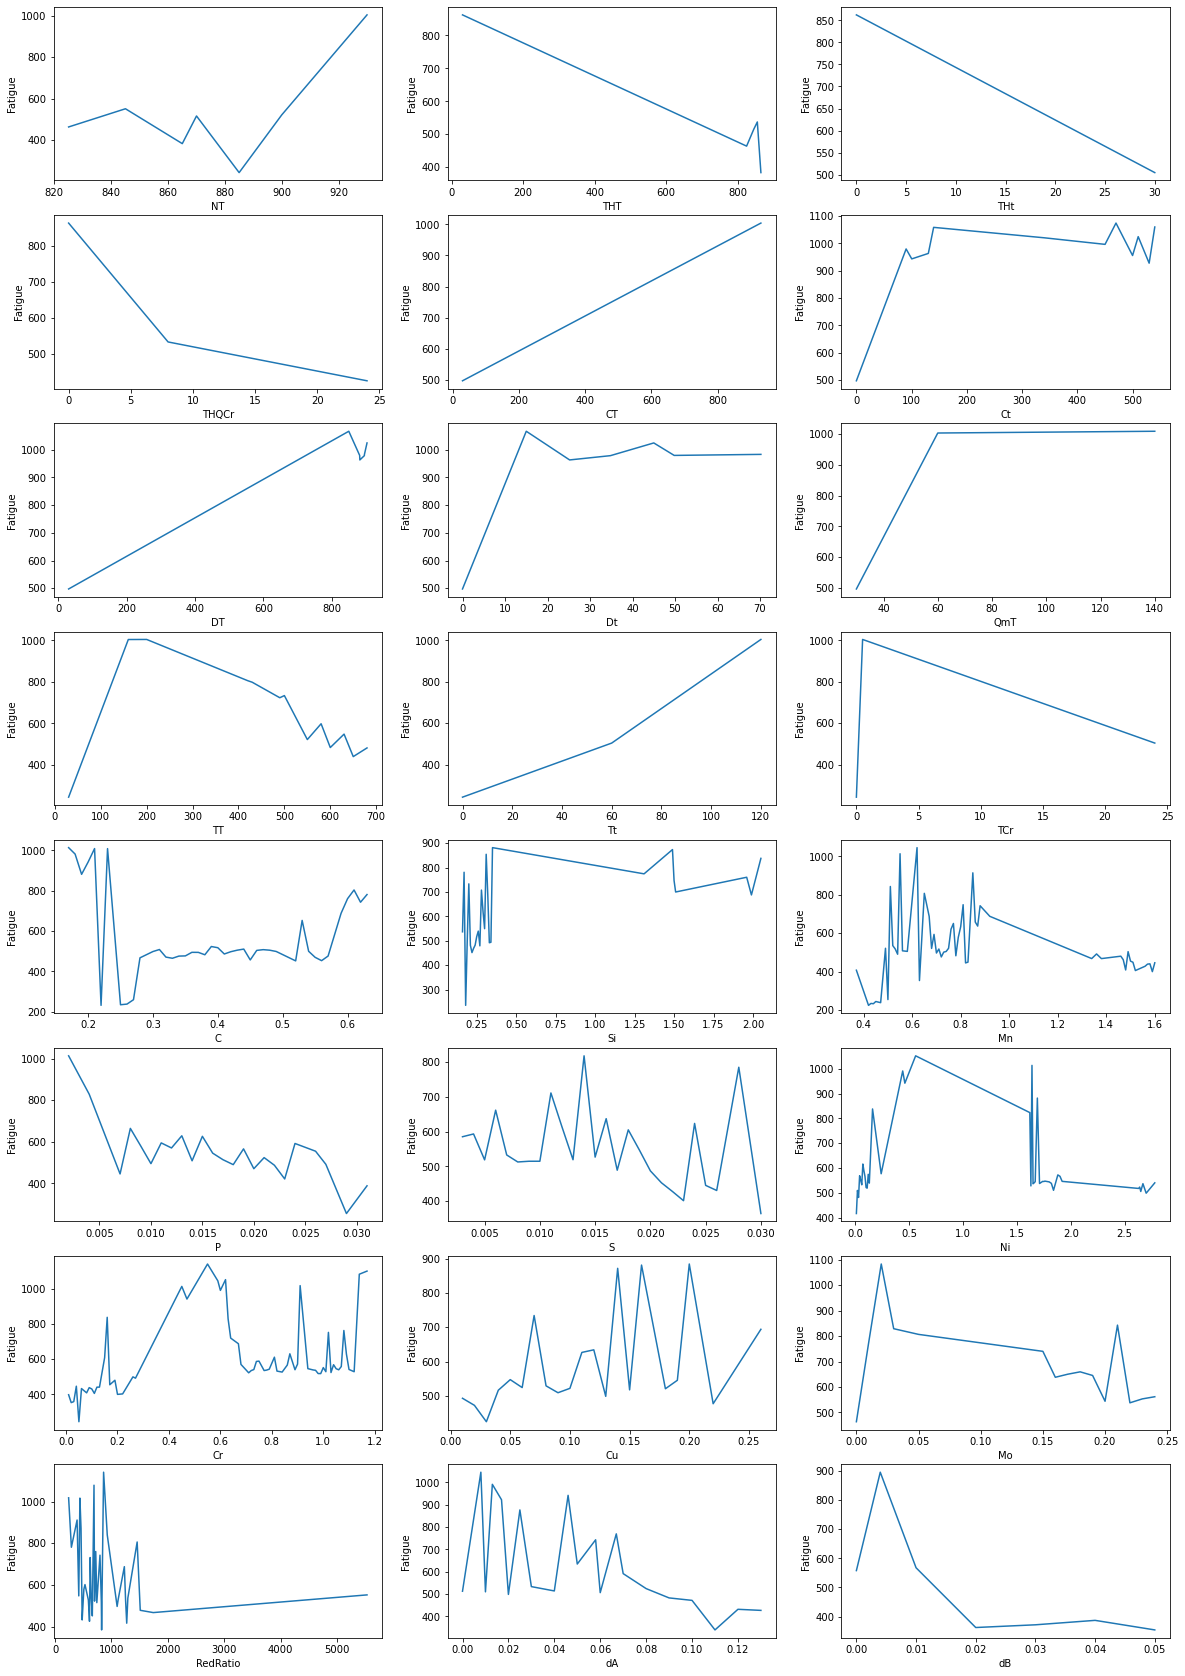

In [9]:
plt.figure(figsize=(20,30))
try:
    for i in enumerate(features):
        plt.subplot(8,3,i[0]+1)
        sns.lineplot(x=i[1], y=df['Fatigue'], data = df, ci=None)
except:
    pass

Variable Description
----------------------------
* C % - Carbon
* Si % - Silicon
* Mn % - Manganese
* P % - Phosphorus
* S % - Sulphur
* Ni % - Nickel
* Cr % - Chromium
* Cu % - Copper
* Mo % - Molybdenum
* NT - Normalizing Temperature
* THT - Through Hardening Temperature
* THt - Through Hardening Time
* THQCr - Cooling Rate for Through Hardening
* CT - Carburization Temperature
* Ct - Carburization Time
* DT - Diffusion Temperature
* Dt - Diffusion time
* QmT - Quenching Media Temperature (for Carburization)
* TT - Tempering Temperature
* Tt - Tempering Time
* TCr - Cooling Rate for Tempering
* RedRatio - Reduction Ratio (Ingot to Bar)
* dA - Area Proportion of Inclusions Deformed by Plastic Work
* dB -Area Proportion of Inclusions Occurring in Discontinuous Array
* dC -Area Proportion of Isolated Inclusions
* Fatigue - Rotating Bending Fatigue Strength (107 Cycles)

In [10]:
df_corr = df.corr()

In [11]:
df_corr

,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,TT,...,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
NT,1.000000,-0.733562,-0.744072,-0.746162,0.774140,0.704048,0.773907,0.680719,0.623976,-0.643439,...,-0.172272,0.349784,0.429045,0.214173,0.313724,-0.275120,-0.388146,-0.107130,-0.085675,0.649459
THT,-0.733562,1.000000,0.999487,0.532870,-0.888675,-0.808212,-0.888408,-0.781432,-0.716294,0.946717,...,-0.154367,0.018620,-0.081163,-0.123265,-0.178605,0.193575,0.012032,-0.020254,0.125157,-0.656615
THt,-0.744072,0.999487,1.000000,0.537420,-0.889131,-0.808627,-0.888864,-0.781833,-0.716662,0.947097,...,-0.152671,0.023860,-0.090569,-0.125586,-0.185783,0.194496,0.015020,-0.025964,0.125478,-0.655897
THQCr,-0.746162,0.532870,0.537420,1.000000,-0.477836,-0.434572,-0.477693,-0.420172,-0.385148,0.514298,...,0.337895,-0.262757,-0.604618,-0.310723,-0.442909,0.238366,0.518123,0.339716,0.013883,-0.553098
CT,0.774140,-0.888675,-0.889131,-0.477836,1.000000,0.909458,0.999700,0.879323,0.806025,-0.786156,...,0.069950,0.020457,0.202449,0.200677,0.266870,-0.245155,-0.080275,-0.045154,-0.175935,0.850296
Ct,0.704048,-0.808212,-0.808627,-0.434572,0.909458,1.000000,0.909506,0.829540,0.832438,-0.711212,...,0.046252,0.035400,0.170568,0.203678,0.234012,-0.221181,-0.080861,-0.047728,-0.159301,0.778942
DT,0.773907,-0.888408,-0.888864,-0.477693,0.999700,0.909506,1.000000,0.888118,0.807133,-0.785889,...,0.070575,0.014695,0.205448,0.202648,0.264147,-0.245533,-0.079074,-0.045767,-0.175925,0.848612
Dt,0.680719,-0.781432,-0.781833,-0.420172,0.879323,0.829540,0.888118,1.000000,0.752087,-0.689811,...,0.066872,-0.084850,0.264144,0.170291,0.173871,-0.222986,-0.046088,-0.034599,-0.144792,0.726105
QmT,0.623976,-0.716294,-0.716662,-0.385148,0.806025,0.832438,0.807133,0.752087,1.000000,-0.640571,...,0.056382,0.016489,0.163179,0.161751,0.215103,-0.197601,-0.064704,-0.036395,-0.141808,0.687954
TT,-0.643439,0.946717,0.947097,0.514298,-0.786156,-0.711212,-0.785889,-0.689811,-0.640571,1.000000,...,-0.147391,0.088601,-0.040170,-0.116524,-0.107609,0.167432,-0.005740,-0.038945,0.080460,-0.634550


## Finding corelations

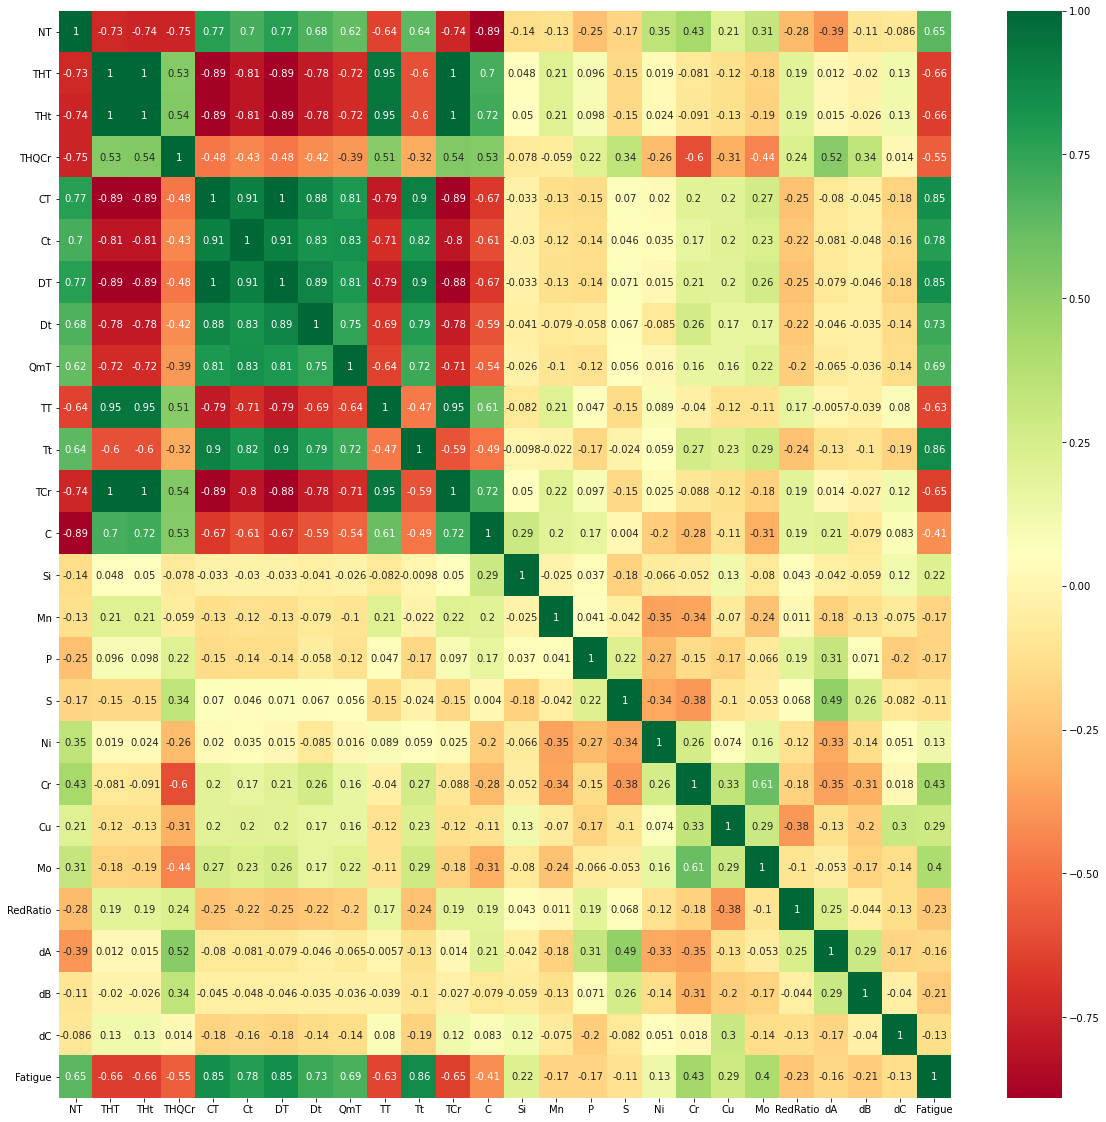

In [12]:
# get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [13]:
# check the shape of dataset
df.shape

(437, 26)

In [14]:
# Description about dataset
# .T is for transpose
df.describe().T

,count,mean,std,min,25%,50%,75%,max
NT,437.0,872.299771,26.212073,825.000,865.000,870.000,870.000,930.000
THT,437.0,737.643021,280.036541,30.000,845.000,845.000,855.000,865.000
THt,437.0,25.949657,10.263824,0.000,30.000,30.000,30.000,30.000
THQCr,437.0,10.654462,7.841437,0.000,8.000,8.000,8.000,24.000
CT,437.0,128.855835,281.743539,30.000,30.000,30.000,30.000,930.000
Ct,437.0,40.502059,126.924697,0.000,0.000,0.000,0.000,540.000
DT,437.0,123.699844,267.128933,30.000,30.000,30.000,30.000,903.333
Dt,437.0,4.843936,15.700076,0.000,0.000,0.000,0.000,70.200
QmT,437.0,35.491991,19.419277,30.000,30.000,30.000,30.000,140.000
TT,437.0,536.842105,164.101963,30.000,550.000,600.000,650.000,680.000


In [15]:
# Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NT        437 non-null    int64  
 1   THT       437 non-null    int64  
 2   THt       437 non-null    int64  
 3   THQCr     437 non-null    int64  
 4   CT        437 non-null    int64  
 5   Ct        437 non-null    float64
 6   DT        437 non-null    float64
 7   Dt        437 non-null    float64
 8   QmT       437 non-null    int64  
 9   TT        437 non-null    int64  
 10  Tt        437 non-null    int64  
 11  TCr       437 non-null    float64
 12  C         437 non-null    float64
 13  Si        437 non-null    float64
 14  Mn        437 non-null    float64
 15  P         437 non-null    float64
 16  S         437 non-null    float64
 17  Ni        437 non-null    float64
 18  Cr        437 non-null    float64
 19  Cu        437 non-null    float64
 20  Mo        437 non-null    float6

## Define dependent and independent variable

In [16]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [17]:
X.shape

(437, 25)

In [18]:
y.shape

(437,)

## Spliting data into train test split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 0)

In [20]:
# 349 rows and 26 columb
X_train.shape

(349, 25)

In [21]:
y_train.shape

(349,)

In [22]:
# 88 rows and 26 clumb
X_test.shape

(88, 25)

In [23]:
y_test.shape

(88,)

# Model Building

## Trianing the dataset on Linear Regression model

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

# Predicting test results

In [25]:
y_pred = lr.predict(X_test)

In [26]:
predicted_value = pd.DataFrame({'Predicted_values': y_pred})

In [27]:
predicted_value.head()

,Predicted_values
0,437.150042
1,429.596409
2,592.602481
3,588.780232
4,460.423410


## Accuracy

In [28]:
from sklearn.metrics import r2_score
print('The accuracy of model is {}'.format(r2_score(y_pred,y_test)*100))

The accuracy of model is 97.45252080345892


## Test on single case

In [29]:
X_test[0]

array([8.70e+02, 8.45e+02, 3.00e+01, 8.00e+00, 3.00e+01, 0.00e+00,
       3.00e+01, 0.00e+00, 3.00e+01, 6.00e+02, 6.00e+01, 2.40e+01,
       4.20e-01, 2.10e-01, 1.60e+00, 1.40e-02, 1.50e-02, 3.00e-02,
       1.20e-01, 7.00e-02, 0.00e+00, 4.80e+02, 2.00e-02, 0.00e+00,
       0.00e+00])

In [30]:
print(lr.predict([[8.70e+02, 8.45e+02, 3.00e+01, 8.00e+00, 3.00e+01, 0.00e+00,
       3.00e+01, 0.00e+00, 3.00e+01, 6.00e+02, 6.00e+01, 2.40e+01,
       4.20e-01, 2.10e-01, 1.60e+00, 1.40e-02, 1.50e-02, 3.00e-02,
       1.20e-01, 7.00e-02, 0.00e+00, 4.80e+02, 2.00e-02, 0.00e+00,
       0.00e+00]]))

[437.15004162]


In [31]:
y_test[0]

451

## Concatenate

In [32]:
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[ 437.15  451.  ]
 [ 429.6   460.  ]
 [ 592.6   588.  ]
 [ 588.78  578.  ]
 [ 460.42  475.  ]
 [ 440.62  419.  ]
 [ 538.62  546.  ]
 [1066.68 1054.  ]
 [ 763.1   770.  ]
 [ 600.4   591.  ]
 [ 246.04  255.  ]
 [ 756.92  794.  ]
 [ 760.68  829.  ]
 [ 523.85  563.  ]
 [ 560.88  530.  ]
 [ 952.63  882.  ]
 [ 348.93  325.  ]
 [ 479.89  464.  ]
 [ 581.83  578.  ]
 [ 558.49  572.  ]
 [ 987.7  1030.  ]
 [ 484.3   477.  ]
 [ 556.08  590.  ]
 [ 556.76  543.  ]
 [ 456.34  433.  ]
 [1110.28 1124.  ]
 [ 483.67  482.  ]
 [ 533.61  557.  ]
 [ 569.8   607.  ]
 [ 528.8   491.  ]
 [ 987.09  948.  ]
 [ 265.1   235.  ]
 [ 374.29  388.  ]
 [ 557.33  542.  ]
 [ 517.22  551.  ]
 [ 469.55  486.  ]
 [ 506.47  491.  ]
 [ 479.79  541.  ]
 [ 489.56  490.  ]
 [ 569.75  543.  ]
 [ 521.22  524.  ]
 [ 958.26  957.  ]
 [ 527.36  515.  ]
 [ 436.82  428.  ]
 [ 542.8   517.  ]
 [ 523.61  524.  ]
 [ 456.11  464.  ]
 [ 439.9   424.  ]
 [ 486.91  476.  ]
 [ 587.83  582.  ]
 [ 412.24  426.  ]
 [ 492.18  505.  ]
 [ 461.75  4

# visualising results

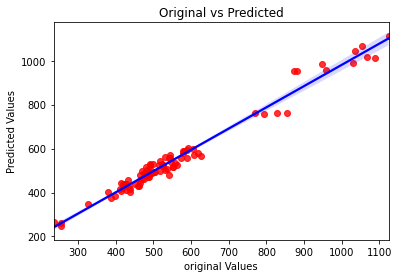

In [33]:
r_plot = sns.regplot(x =y_test,y =y_pred, data = df,scatter_kws={'color':'red'},line_kws={'color':'blue'})
plt.xlabel('original Values')
plt.ylabel('Predicted Values')
plt.title('Original vs Predicted')
plt.show()

## Calculatting_difference

In [34]:
diff = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference': y_test - y_pred})

In [35]:
diff.head()

,Actual Value,Predicted Value,Difference
0,451,437.150042,13.849958
1,460,429.596409,30.403591
2,588,592.602481,-4.602481
3,578,588.780232,-10.780232
4,475,460.423410,14.576590


# Feature Importance

### This are the top 10 parameters that affects the Fatigue 

In [36]:
m = df.drop('Fatigue',axis =1)

[0.01 0.01 0.   0.   0.   0.02 0.01 0.01 0.01 0.37 0.   0.   0.05 0.05
 0.05 0.05 0.05 0.05 0.06 0.05 0.02 0.04 0.05 0.02 0.03]


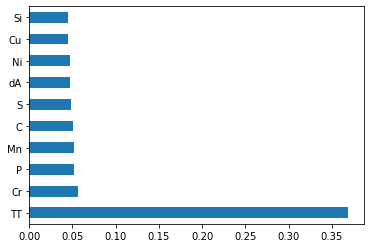

In [37]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=m.columns)
feat_importances.nlargest(10).plot(kind='barh')         
plt.show()